In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [3]:
url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
df = pd.read_csv(url)
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
df.shape

(700, 2)

In [5]:
# Drop the missing values
df = df.dropna()

# training dataset and labels
train_input = np.array(df.x[0:500]).reshape(500, 1)
train_output = np.array(df.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(df.x[500:700]).reshape(199, 1)
test_output = np.array(df.x[500:700]).reshape(199, 1)


In [6]:
class LinearRegression: 
	def __init__(self): 
		self.parameters = {} 

	def forward_propagation(self, train_input): 
		m = self.parameters['m'] 
		c = self.parameters['c'] 
		predictions = np.multiply(m, train_input) + c 
		return predictions 

	def cost_function(self, predictions, train_output): 
		cost = np.mean((train_output - predictions) ** 2) 
		return cost 

	def backward_propagation(self, train_input, train_output, predictions): 
		derivatives = {} 
		df = (predictions-train_output) 
		# dm= 2/n * mean of (predictions-actual) * input 
		dm = 2 * np.mean(np.multiply(train_input, df)) 
		# dc = 2/n * mean of (predictions-actual) 
		dc = 2 * np.mean(df) 
		derivatives['dm'] = dm 
		derivatives['dc'] = dc 
		return derivatives 

	def update_parameters(self, derivatives, learning_rate): 
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

	def train(self, train_input, train_output, learning_rate, iters): 
		# Initialize random parameters 
		self.parameters['m'] = np.random.uniform(0, 1) * -1
		self.parameters['c'] = np.random.uniform(0, 1) * -1

		# Initialize loss 
		self.loss = [] 

		# Initialize figure and axis for animation 
		fig, ax = plt.subplots() 
		x_vals = np.linspace(min(train_input), max(train_input), 100) 
		line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
						self.parameters['c'], color='red', label='Regression Line') 
		ax.scatter(train_input, train_output, marker='o', 
				color='green', label='Training Data') 

		# Set y-axis limits to exclude negative values 
		ax.set_ylim(0, max(train_output) + 1) 

		def update(frame): 
			# Forward propagation 
			predictions = self.forward_propagation(train_input) 

			# Cost function 
			cost = self.cost_function(predictions, train_output) 

			# Back propagation 
			derivatives = self.backward_propagation( 
				train_input, train_output, predictions) 

			# Update parameters 
			self.update_parameters(derivatives, learning_rate) 

			# Update the regression line 
			line.set_ydata(self.parameters['m'] 
						* x_vals + self.parameters['c']) 

			# Append loss and print 
			self.loss.append(cost) 
			print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

			return line, 
		# Create animation 
		ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=False, repeat = False) 

		# Save the animation as a video file (e.g., MP4) 
		ani.save('linear_regression_A.gif', writer='ffmpeg') 

		plt.xlabel('Input') 
		plt.ylabel('Output') 
		plt.title('Linear Regression') 
		plt.legend() 
		plt.show() 

		return self.parameters, self.loss 

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 9707.710810545701
Iteration = 1, Loss = 1176.7692710581334
Iteration = 2, Loss = 148.6979755502599
Iteration = 3, Loss = 24.804195658959667
Iteration = 4, Loss = 9.87364625974599
Iteration = 5, Loss = 8.074351945133117
Iteration = 6, Loss = 7.8575167713167104
Iteration = 7, Loss = 7.831385145400878
Iteration = 8, Loss = 7.828235372432969
Iteration = 9, Loss = 7.827855162912305
Iteration = 10, Loss = 7.82780871599049
Iteration = 11, Loss = 7.827802491157286
Iteration = 12, Loss = 7.827801113586695
Iteration = 13, Loss = 7.827800320227211
Iteration = 14, Loss = 7.827799597334726
Iteration = 15, Loss = 7.827798882997475
Iteration = 16, Loss = 7.827798169754415
Iteration = 17, Loss = 7.827797456706396
Iteration = 18, Loss = 7.82779674374506
Iteration = 19, Loss = 7.827796030857344
Iteration = 20, Loss = 7.827795318041662


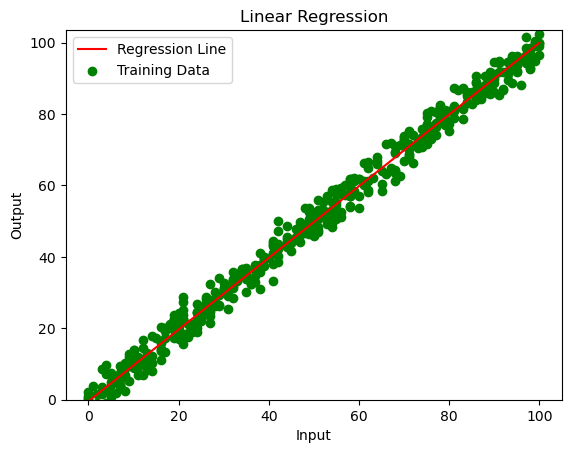

In [7]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3* X + np.random.randn(m,1)

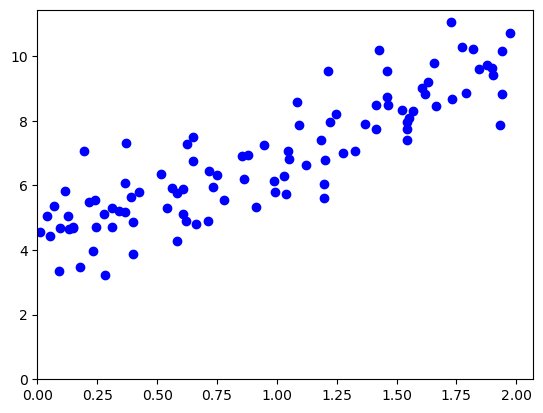

In [9]:
plt.scatter(X, y, color ="blue")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

In [10]:
from sklearn.preprocessing import add_dummy_feature

In [11]:
X_b = add_dummy_feature(X)

In [12]:
# formula to calculate theta best X_b.T@X_b)@X_b.T @ y
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T @ y

In [13]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [14]:
a = [1,2,3,4]

In [15]:
b = [5,6,7,8]

In [16]:
# matmul stands for matrix multiplication
np.matmul(a,b)

70

In [17]:
c = np.array(a)

In [18]:
d = np.array(b)

In [19]:
c @ d

70

In [20]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

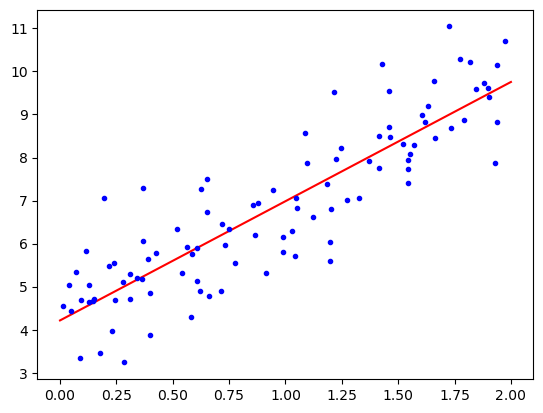

In [21]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X,y,"b.")
plt.show()

# Linear Regression Model Building

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
customers = pd.read_csv('Ecommerce Customers.txt')

In [24]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
import seaborn as sns

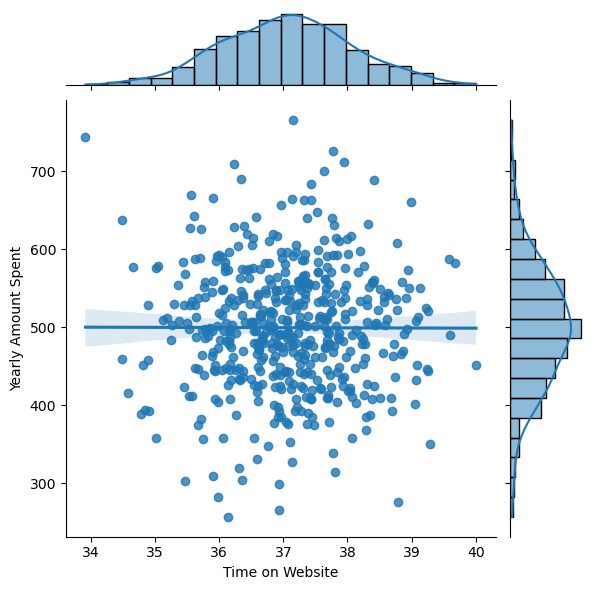

In [28]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent', kind="reg")

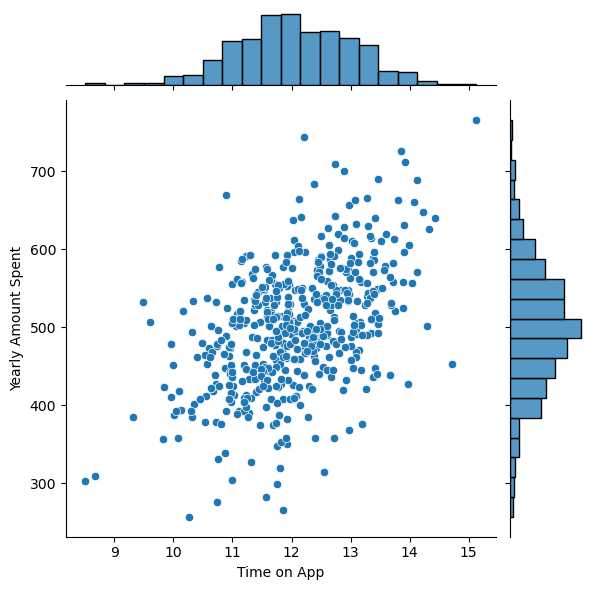

In [29]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


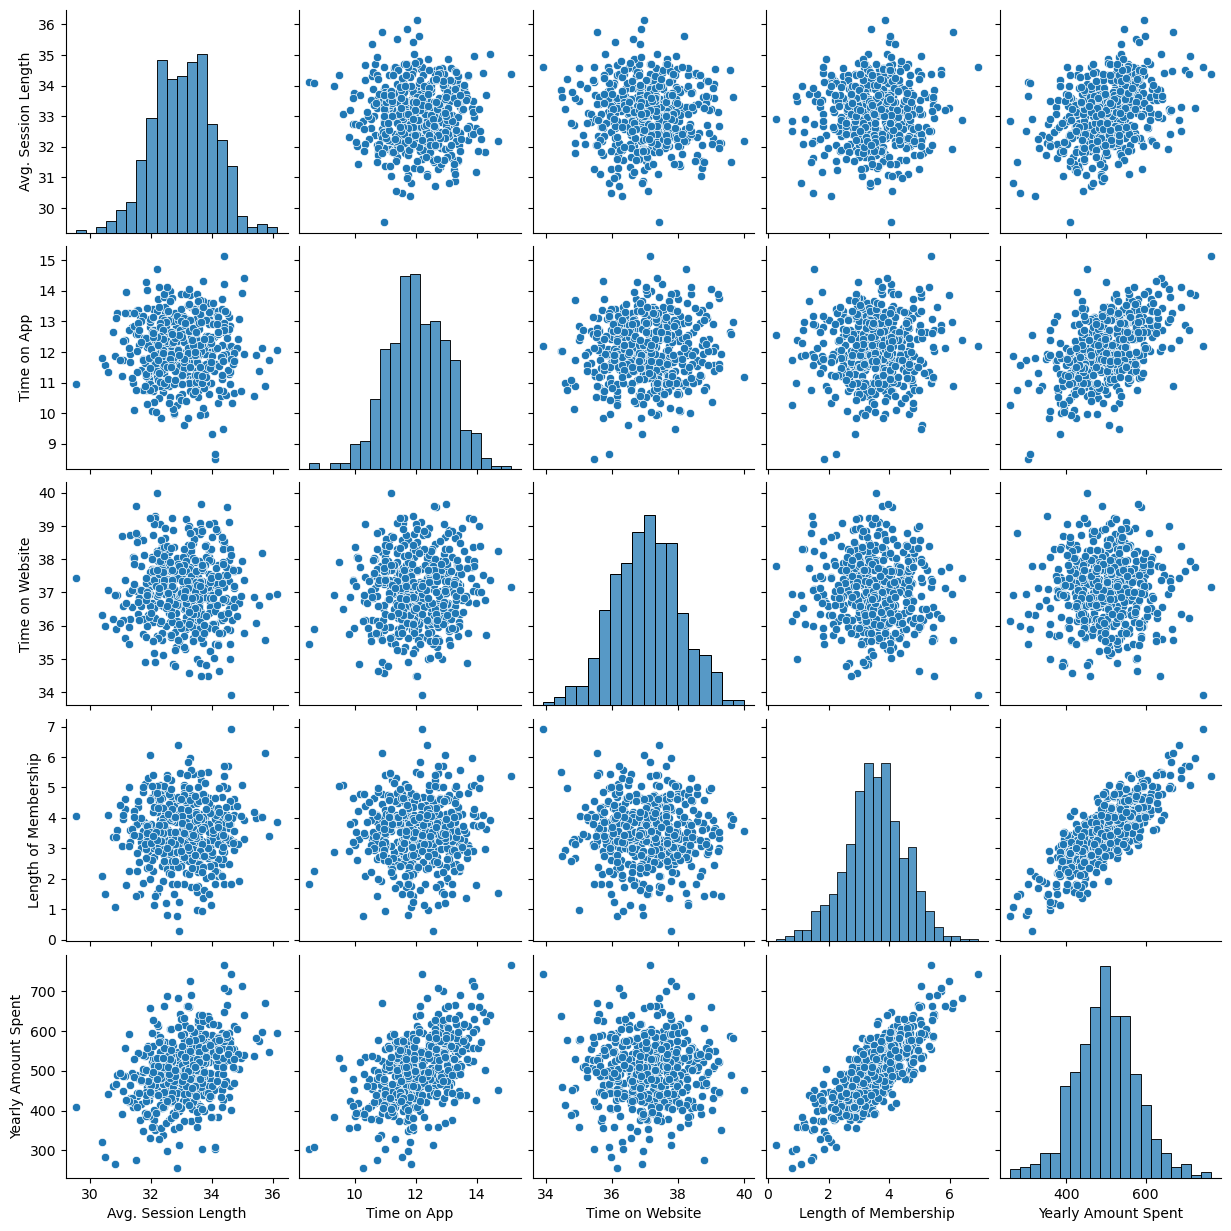

In [30]:
sns.pairplot(customers)

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


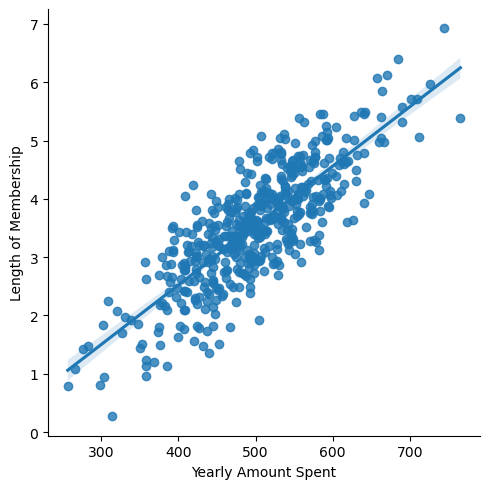

In [31]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers)

In [32]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# X_train, X_test, y_train, y_test always follow this captial X and small y this is the formula 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Create an instance of a LinearRegression() model named lm
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [39]:
print('Intercept: \n', lm.intercept_)

Intercept: 
 -1047.932782250239


In [40]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

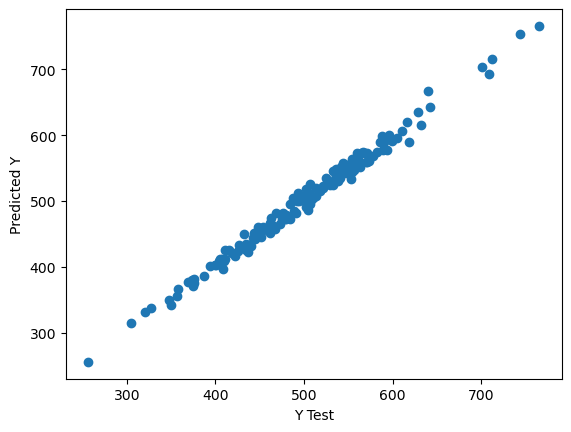

In [41]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
score = lm.score(X_test, y_test);
print(score*100, "%")

98.90046246741234 %


In [43]:
 from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430845
MSE: 79.81305165097454
RMSE: 8.933815066978639


In [44]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [45]:
import numpy as np

In [46]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            
            # Predicted values
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
# Example usage
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y = np.array([2,3, 4, 5, 6])
    
    # Initialize and train the model
    model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
    model.fit(X, y)
    
    # Predict
    y_pred = model.predict(X)
    print("Predictions:", y_pred)
    

Predictions: [1.9748008  2.98471135 3.9946219  5.00453245 6.014443  ]


In [47]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            for i in range(n_samples):
            
                # Randomly select a single data point
                random_index = np.random.randint(n_samples)
                X_random =  X[random_index, :].reshape(1, -1)
                y_random = y[random_index]
            
            # Predicted value for the single data point
            y_predicted = np.dot(X_random, self.weights) + self.bias
            
            # Compute gradients for the single data points
            dw = np.dot(X_random.T, (y_predicted - y_random))
            db = (y_predicted - y_random)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
# Example usage
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y = np.array([2, 3, 4, 5, 6])
    
    # Initialize and train the model
    model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
    model.fit(X, y)
    
    # Predict
    y_pred = model.predict(X)
    print("Predictions:", y_pred)

Predictions: [1.97380412 2.98411143 3.99441875 5.00472607 6.01503339]


In [61]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model, metrics

In [54]:
X, y = load_breast_cancer(return_X_y=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 23)

In [56]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [57]:
y_pred = clf.predict(X_test)

In [58]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0])

In [60]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 95.6140350877193


In [62]:
digits = datasets.load_digits()

In [63]:
X = digits.data
y = digits.target

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 96.52294853963839


C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
